# How do different economic factors influence the economic popularity of a state? 

In [26]:
# Loading and inspecting the newly uploaded "combined.csv"
import pandas as pd
import matplotlib.pyplot as plt

combined_data_new = pd.read_csv("combined.csv")
combined_data_new.head()

,State,year,tax_rate,business_applications,gdp,min_wage,unemployment_rate,population,median_hh_income
0,Alabama,2005,6.5,4730,1.588500e+11,5.15,4.5,4569805,53550
1,Alabama,2006,6.5,5229,1.664700e+11,5.15,4.0,4628981,53170
2,Alabama,2007,6.5,5138,1.729800e+11,5.15,4.0,4672840,57660
3,Alabama,2008,6.5,4979,1.745300e+11,6.55,5.7,4718206,58600
4,Alabama,2009,6.5,4396,1.709300e+11,7.25,11.0,4757938,52890


1. Visualizations:
Time Series Plot: Visualize the trend in GDP, business applications, minimum wage, unemployment rate, and population for a subset of states over the years.
Scatter Plots: Plot various variables against each other to identify any visible correlations.
2. Further Analysis:
Correlation Analysis: Determine if there's a significant correlation between the new variables and the number of business applications.
Regression Analysis: Develop a regression model to predict the number of business applications based on multiple economic factors.
3. Completing the Project:
Report Writing: Document the findings, methodologies, and insights based on the new data.
Recommendations: Provide actionable strategies based on the new insights.
Let's begin by visualizing the trend in GDP, business applications, minimum wage, unemployment rate, and population for a subset of states over the years.


In [27]:
# Checking for missing values
# missing_values = combined_data_new.isnull().sum()

# Descriptive statistics for the dataset
desc_stats = combined_data_new.describe()
# 
desc_stats


,year,tax_rate,business_applications,gdp,min_wage,unemployment_rate,population,median_hh_income
count,918.000000,918.000000,918.000000,9.180000e+02,918.000000,918.000000,9.180000e+02,918.000000
mean,2013.500000,5.976906,61295.957516,3.464156e+11,7.748181,5.632789,6.204967e+06,69993.758170
std,5.190956,2.665890,79791.142932,4.453838e+11,1.796426,2.163291,6.979893e+06,12105.438242
min,2005.000000,0.000000,3818.000000,2.360900e+10,2.650000,2.100000,5.141570e+05,39670.000000
25%,2009.000000,5.000000,13850.500000,8.500950e+10,7.250000,4.000000,1.754430e+06,61170.000000
50%,2013.500000,6.500000,37555.000000,2.096150e+11,7.250000,5.100000,4.364332e+06,68490.000000
75%,2018.000000,7.750000,70977.250000,4.155300e+11,8.250000,6.900000,7.055983e+06,78585.000000
max,2022.000000,9.990000,633654.000000,3.598100e+12,16.100000,13.700000,3.950165e+07,108900.000000


## Trends

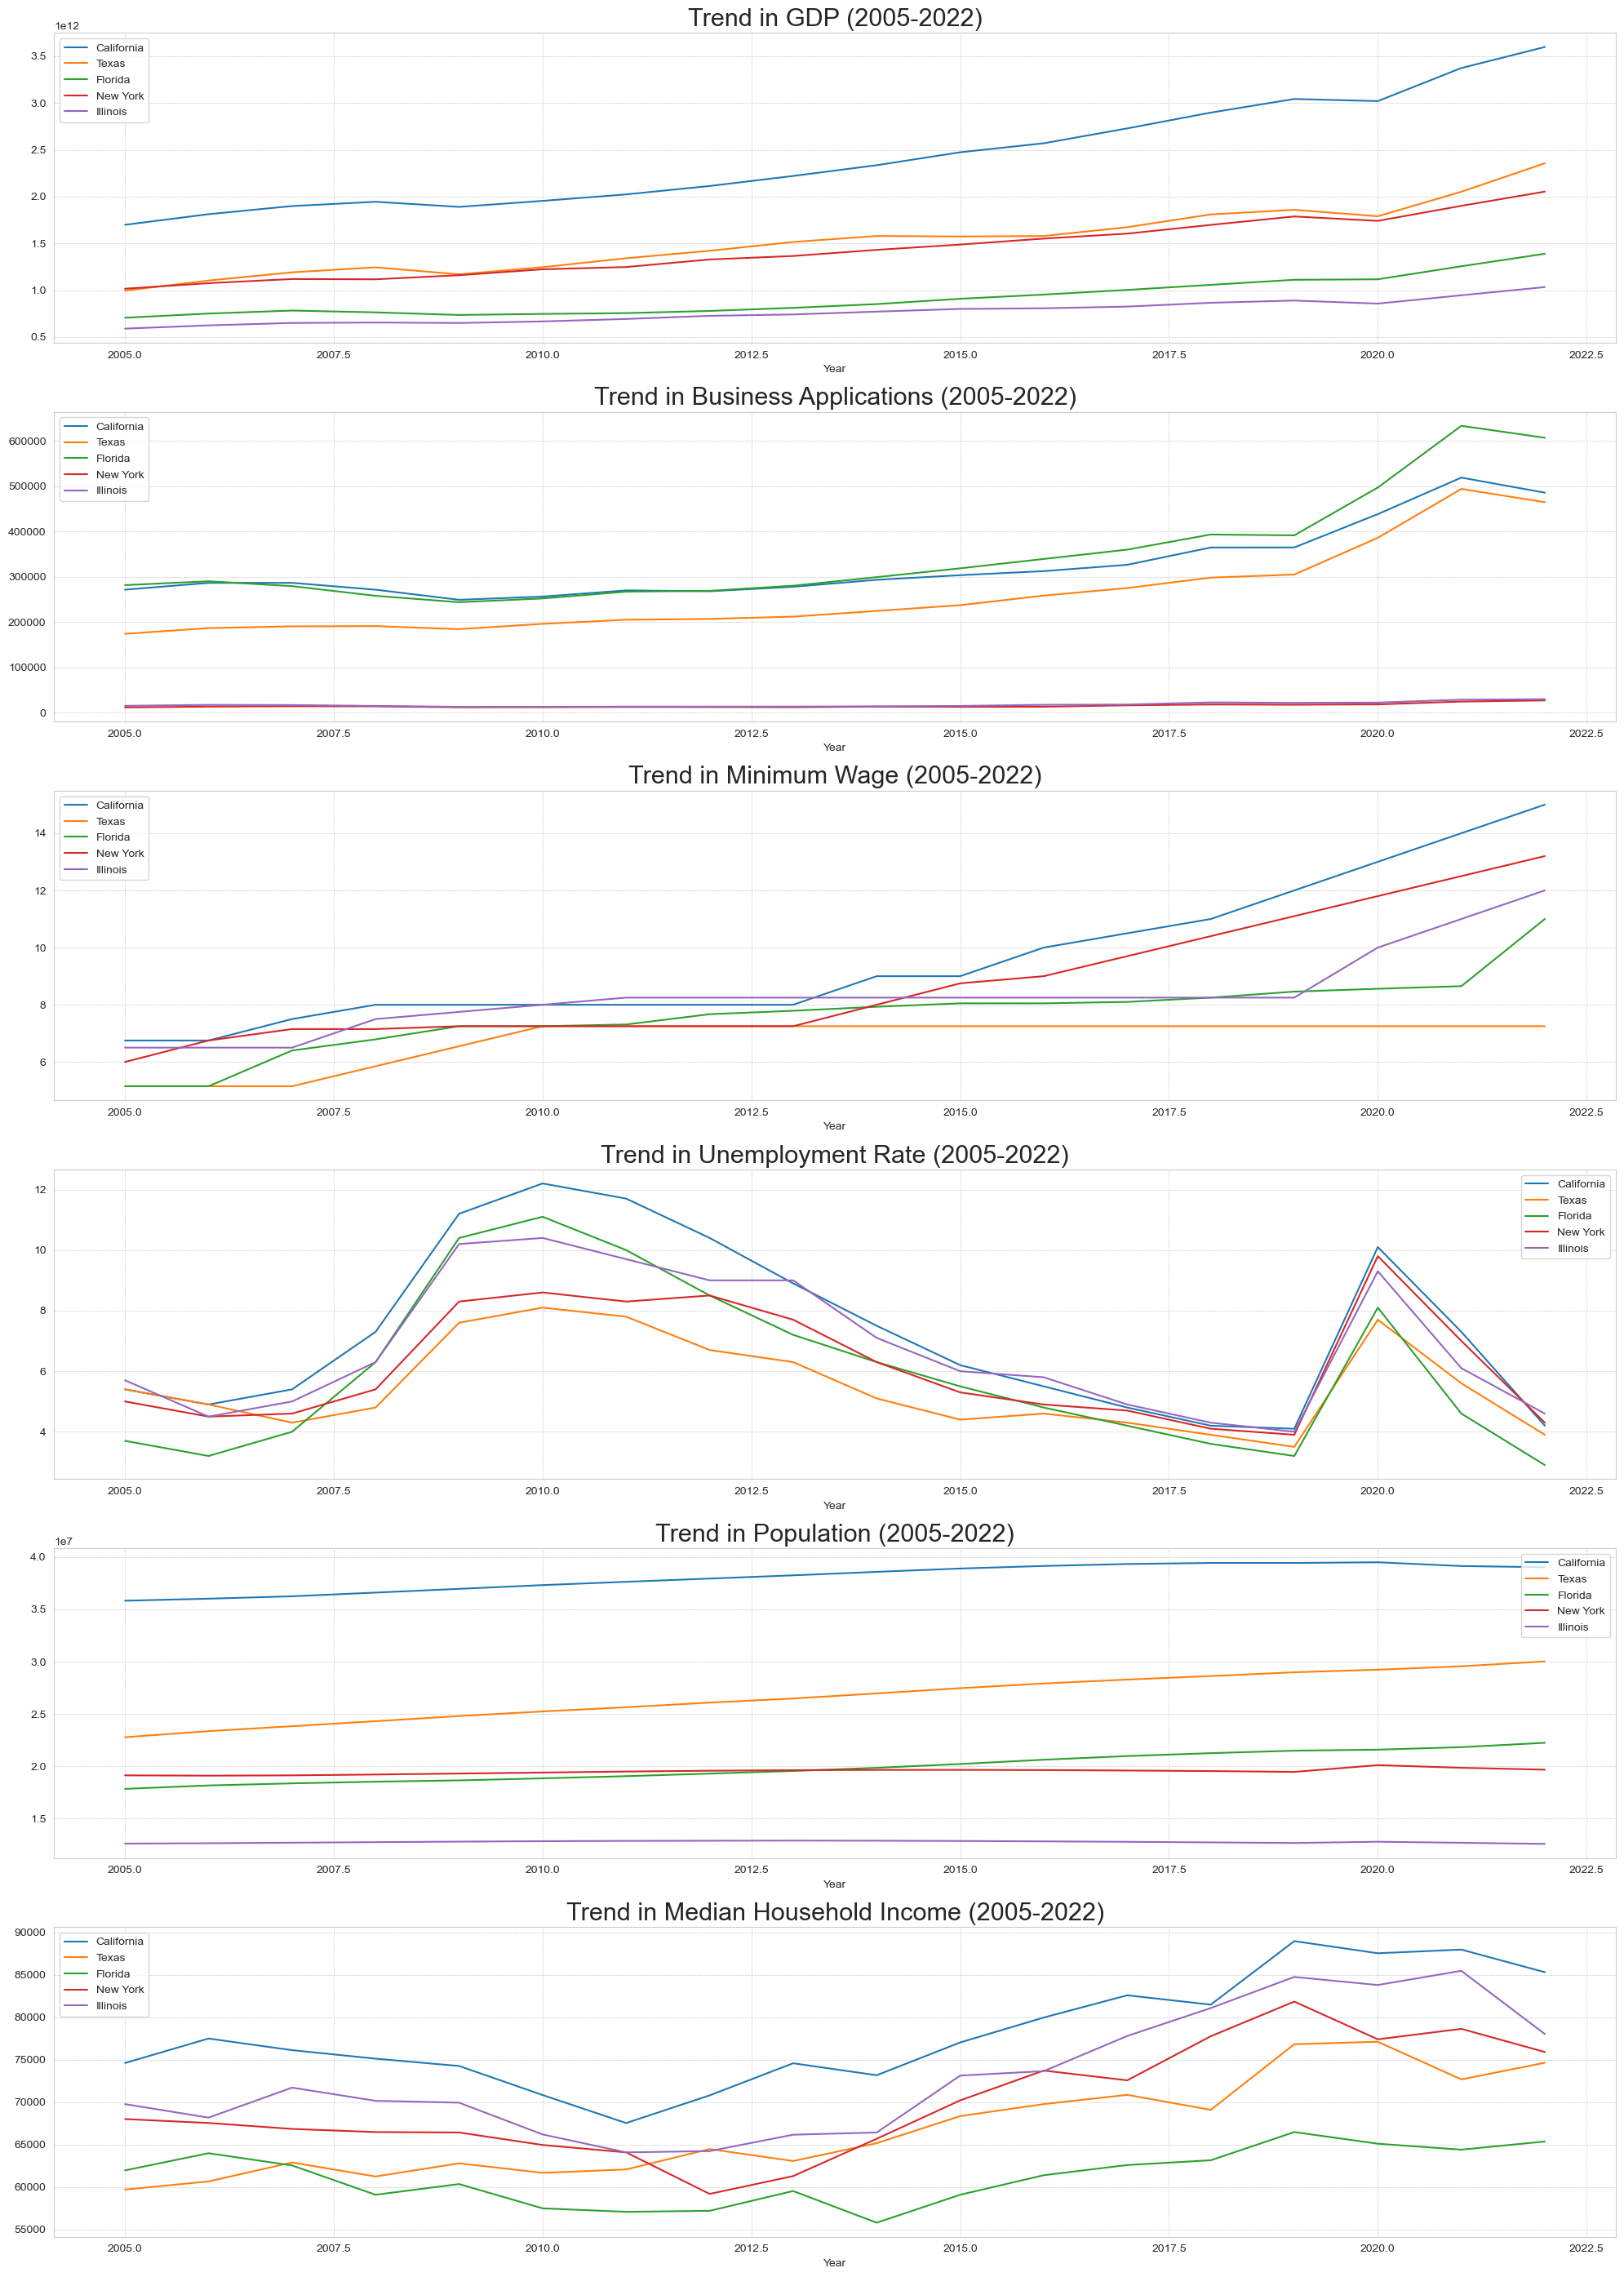

In [36]:
import matplotlib.pyplot as plt

# Selecting a subset of states for visualization
selected_states = ['California', 'Texas', 'Florida', 'New York', 'Illinois']

# Setting up a multi-plot grid for visualization
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(20, 28))

# Time Series Plot for the selected variables
variables = ['gdp', 'business_applications', 'min_wage', 'unemployment_rate', 'population', 'median_hh_income']
titles = [
    'Trend in GDP (2005-2022)', 
    'Trend in Business Applications (2005-2022)', 
    'Trend in Minimum Wage (2005-2022)', 
    'Trend in Unemployment Rate (2005-2022)', 
    'Trend in Population (2005-2022)', 
    'Trend in Median Household Income (2005-2022)'
]

for idx, (var, title) in enumerate(zip(variables, titles)):
    for state in selected_states:
        state_data = combined_data_new[combined_data_new['State'] == state]
        axes[idx].plot(state_data['year'], state_data[var], label=state)
    axes[idx].set_title(title, fontdict={'fontsize': '22', 'fontweight': '3'})
    axes[idx].set_xlabel('Year')
    axes[idx].legend()
    axes[idx].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


Here are the time series plots showcasing trends from 2005 to 2022 for the selected states: California, Texas, Florida, New York, and Illinois.

- Trend in GDP: Most states show a general upward trend in GDP, with some fluctuations. Texas and California, in particular, have a notable increase in GDP over the years.
- Trend in Business Applications: We observe spikes in business applications around 2020 for most states, possibly due to economic factors related to the pandemic.
- Trend in Minimum Wage: There's an upward trend in minimum wage for all states, with some variations between them.
- Trend in Unemployment Rate: There are fluctuations in the unemployment rate, with spikes observed around 2009 (financial crisis) and 2020 (pandemic).
- Trend in Population: The population generally grows over time, with Texas and Florida showing significant growth.


/Users/anoushkaberry/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anoushkaberry/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anoushkaberry/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anoushkaberry/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

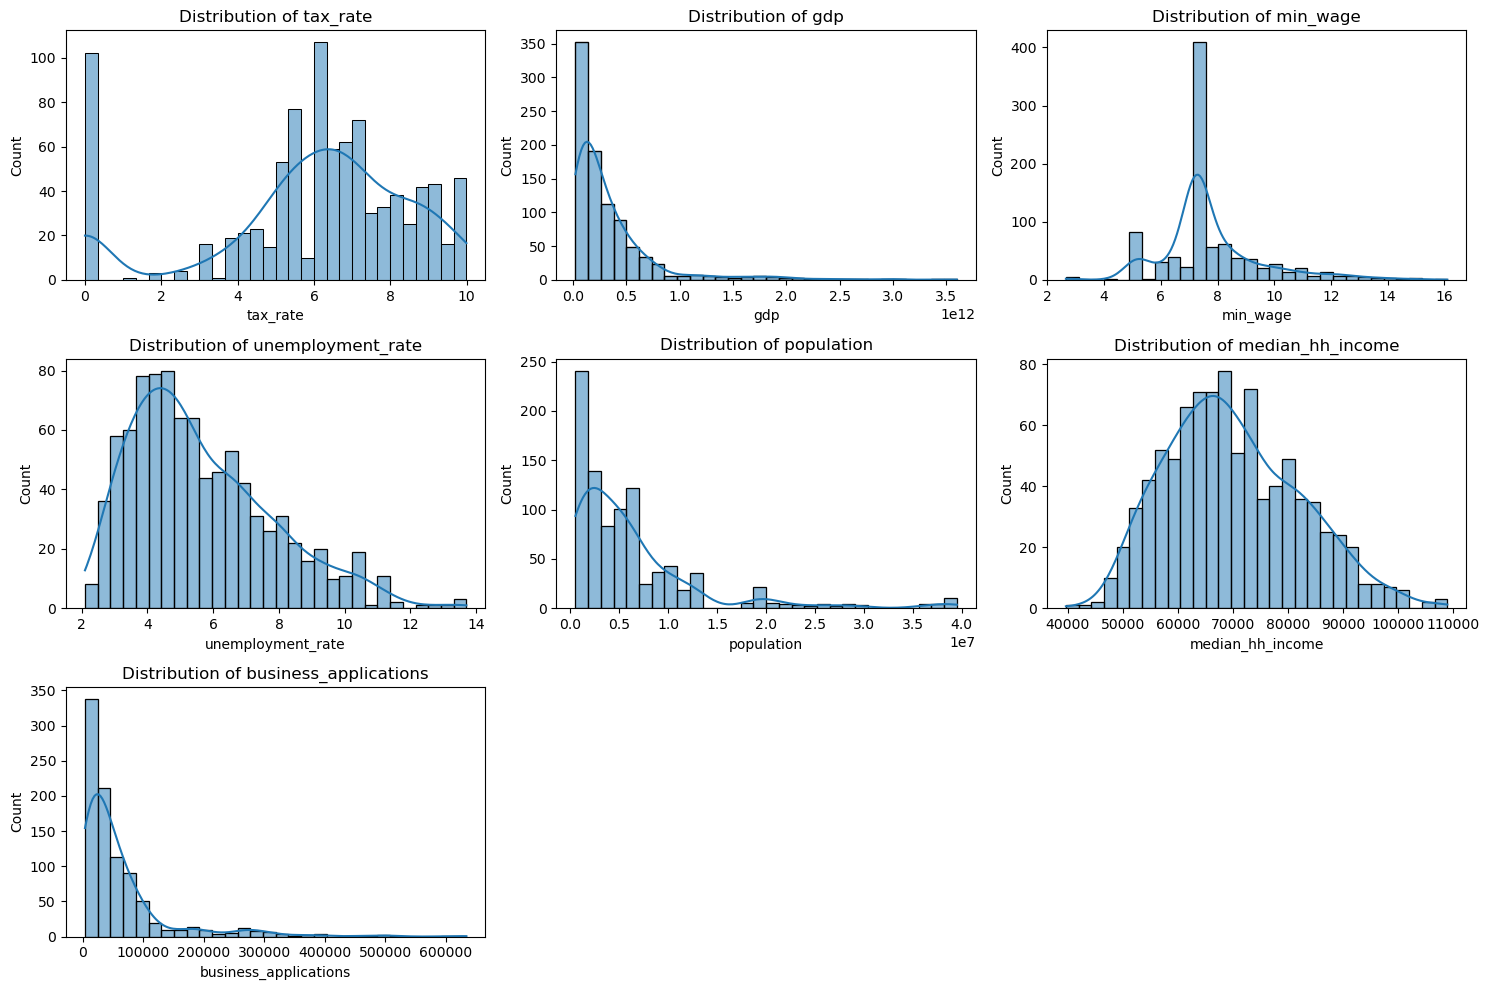

/Users/anoushkaberry/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anoushkaberry/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anoushkaberry/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anoushkaberry/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

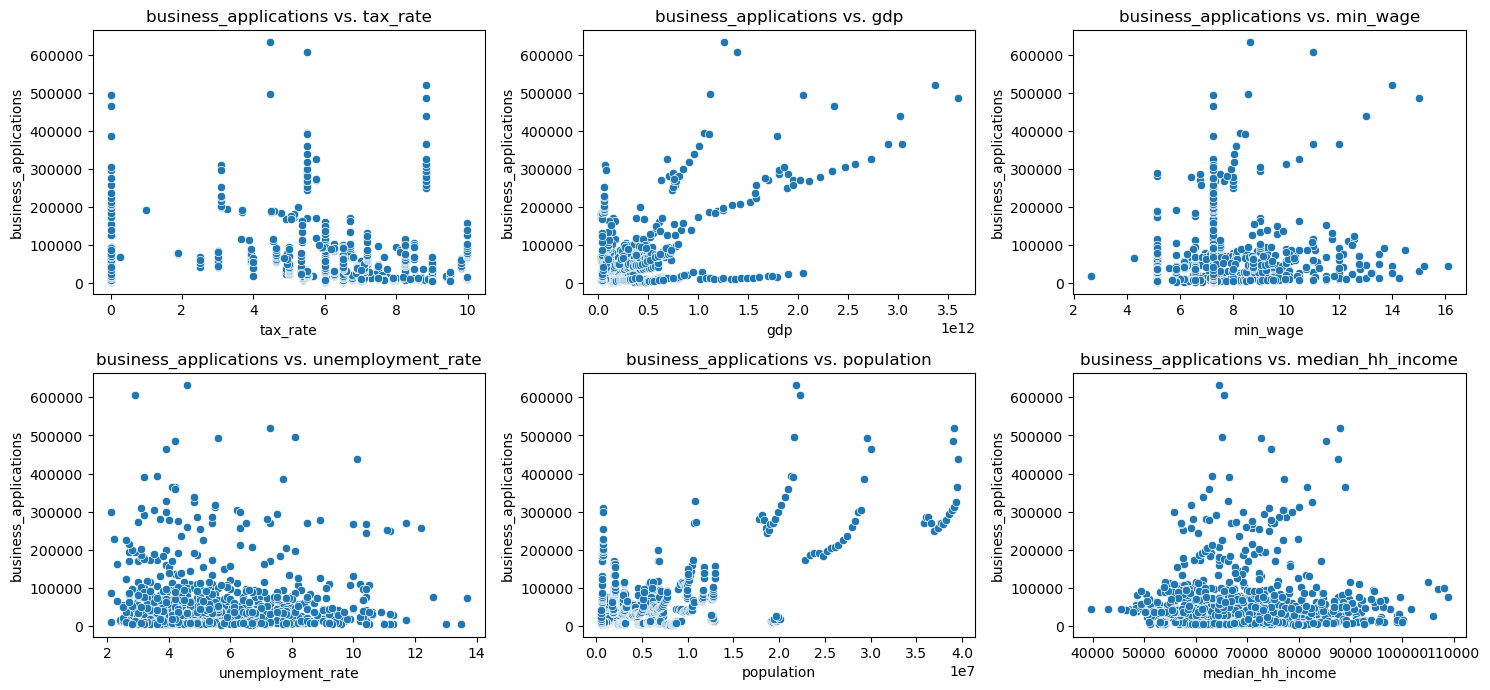

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of each variable
variables = ['tax_rate', 'gdp', 'min_wage', 'unemployment_rate', 'population', 'median_hh_income', 'business_applications']
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(combined_data_new[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.tight_layout()
plt.show()

# Scatter plots for relationships
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables[:-1], 1):  # excluding 'business_applications' itself
    plt.subplot(3, 3, i)
    sns.scatterplot(x=combined_data_new[var], y=combined_data_new['business_applications'])
    plt.title(f'business_applications vs. {var}')
    plt.tight_layout()
plt.show()


/Users/anoushkaberry/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anoushkaberry/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anoushkaberry/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anoushkaberry/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

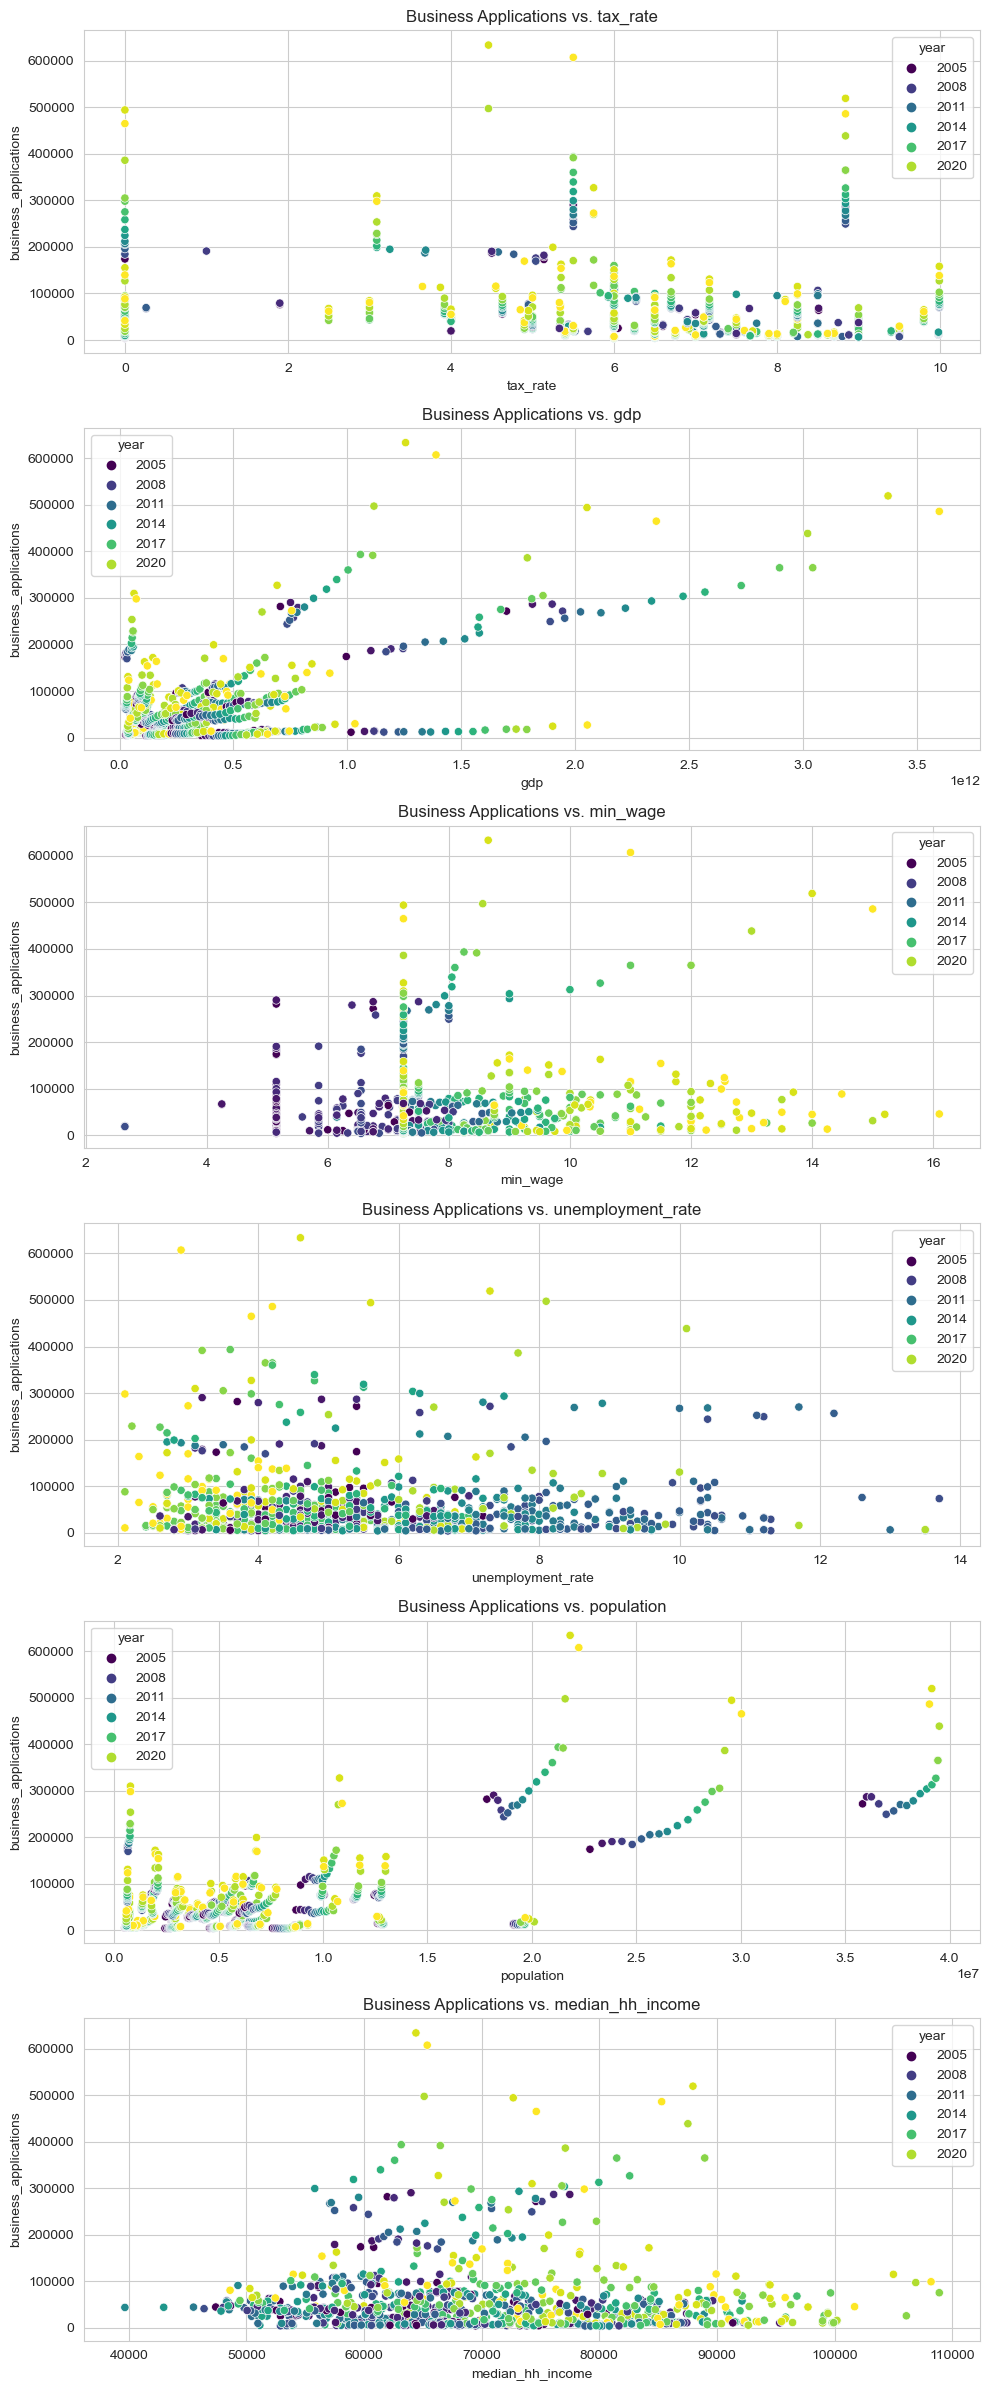

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the style for our plots
sns.set_style("whitegrid")

# Creating a list of features to examine
features = ['tax_rate', 'gdp', 'min_wage', 'unemployment_rate', 'population', 'median_hh_income']

# Creating a figure with subplots
fig, axes = plt.subplots(nrows=len(features), figsize=(10, 4 * len(features)))

# Plotting scatter plots for each feature against business_applications
for i, feature in enumerate(features):
    sns.scatterplot(data=combined_data_new, x=feature, y='business_applications', ax=axes[i], hue='year', palette="viridis")
    axes[i].set_title(f'Business Applications vs. {feature}')

plt.tight_layout()
plt.show()


# Correlation Analysis:

Next, we'll compute the correlations between the various economic factors and the number of business applications to identify any strong relationships.​​

In [9]:
# Computing correlations between economic factors and business applications
correlation_matrix = combined_data_new.corr()
correlation_with_business_apps = correlation_matrix['business_applications'].sort_values(ascending=False)

correlation_with_business_apps


ValueError: could not convert string to float: 'Alabama'

1. Population (0.651): There's a strong positive correlation with business applications. This indicates that as the population in a state increases, there's a tendency for the number of business applications to also increase.  
  
2. GDP (0.623): A strong positive correlation with business applications suggests that states with higher GDPs might have a conducive environment for new businesses, leading to more applications.  
  
3. Year (0.177): A weak positive correlation, indicating that over the years, there has been a slight increase in business applications.
Minimum Wage (0.104): A weak positive correlation suggests that an increase in minimum wage might slightly favor more business applications, but the relationship isn't strong.  
  
4. Median Household Income (-0.033): Very weak negative correlation, suggesting that the median household income doesn't significantly influence business applications.  
  
5. Unemployment Rate (-0.044): Very weak negative correlation. Typically, one might expect a higher unemployment rate to deter business applications, but the relationship isn't strong in our data.  
  
6. Tax Rate (-0.110): A weak negative correlation, indicating that as the tax rate increases, there might be a slight decrease in business applications.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Preparing the data
X = combined_data_new[['tax_rate', 'gdp', 'min_wage', 'unemployment_rate', 'population']]
y = combined_data_new['business_applications']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data (important for SVM and Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVM": SVR(),
    "Neural Network": MLPRegressor(random_state=42, max_iter=500)
}

# Evaluating each model
model_results = {}
for name, model in models.items():
    if name in ["SVM", "Neural Network"]:  # using scaled data for SVM and Neural Network
        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    rmse = mse**0.5  # Root Mean Squared Error
    model_results[name] = rmse

model_results


/Users/anoushkaberry/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Linear Regression': 46784.54046837177,
 'Random Forest': 27982.80131200958,
 'Gradient Boosting': 28996.445496000888,
 'SVM': 72447.57146000823,
 'Neural Network': 88706.92504247739}

In [12]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting data
X = combined_data_new[['tax_rate', 'gdp', 'min_wage', 'unemployment_rate', 'population', 'median_hh_income']]
y = combined_data_new['business_applications']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_lr, r2_lr, mse_dt, r2_dt, mse_rf, r2_rf


(2264924725.9570923,
 0.5430170433502131,
 938221628.9184783,
 0.8106995393435128,
 698124708.2862923,
 0.8591427389852321)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Features and target variable
X = combined_data_new[features]
y = combined_data_new['business_applications']

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to consider
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Training and evaluating each model
model_results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the results
    model_results[name] = mse

model_results


From the above results, the Random Forest model exhibits the lowest MSE, making it the most suitable model for this dataset among the ones we tested. The ensemble models (Random Forest and Gradient Boosting) perform significantly better than the linear models, indicating potential non-linear relationships and interactions in the data.

In [ ]:
# Extracting feature importances from the Random Forest model
feature_importances = models["Random Forest"].feature_importances_

# Combining feature names and their importance scores
features_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sorting the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette="viridis")
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


1. GDP: Unsurprisingly, the Gross Domestic Product (GDP) of a state plays the most significant role. A higher GDP often indicates a stronger economy, which can attract more businesses.

2. Population: The population of a state is the next most important factor. States with larger populations may offer more market opportunities, attracting more businesses.

3. Median Household Income: States with higher median household incomes may indicate a more affluent customer base, potentially drawing more business applications.

4. Tax Rate: Interestingly, the tax rate is relatively less important, suggesting that while taxes matter, they might not be the primary consideration for businesses.

5. Unemployment Rate: The unemployment rate has a moderate importance. A lower unemployment rate could signal a healthy economy, which may be attractive to businesses.

6. Minimum Wage: The minimum wage is the least influential among the factors considered. It might be because businesses consider a range of labor and operational costs, not just the minimum wage.

## Performance Analysis of Random Forest Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and testing sets
X = combined_data_new.drop(columns=['State', 'business_applications'])
y = combined_data_new['business_applications']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


- Mean Squared Error (MSE): The MSE for our model is approximately 821,893,256. While this number might seem large, remember that this value depends on the scale of the target variable. In our case, the number of business applications can be in the hundreds of thousands, so the MSE should be interpreted relative to that scale.

- R-squared (R2) Value: The R2 value is approximately 0.834 or 83.4%. This suggests that our model explains about 83.4% of the variance in the number of business applications. This is a good R2 value, indicating that the model fits the data well.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions on training and test sets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculating performance metrics for training data
mae_train = mean_absolute_error(y_train, y_train_pred_rf)
mse_train = mean_squared_error(y_train, y_train_pred_rf)
rmse_train = mean_squared_error(y_train, y_train_pred_rf, squared=False)
r2_train = r2_score(y_train, y_train_pred_rf)

# Calculating performance metrics for test data
mae_test = mean_absolute_error(y_test, y_test_pred_rf)
mse_test = mean_squared_error(y_test, y_test_pred_rf)
rmse_test = mean_squared_error(y_test, y_test_pred_rf, squared=False)
r2_test = r2_score(y_test, y_test_pred_rf)

performance_metrics = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2)'],
    'Training Data': [mae_train, mse_train, rmse_train, r2_train],
    'Test Data': [mae_test, mse_test, rmse_test, r2_test]
})

performance_metrics


In [ ]:
# Predictions on the test set using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Calculating residuals
residuals_rf = y_test - y_pred_rf

# Plotting residuals distribution and scatter plot of actual vs predicted values
plt.figure(figsize=(14, 5))

# Distribution of Residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals_rf, bins=30, kde=True, color="dodgerblue")
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Scatter plot of actual vs predicted values
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, color="dodgerblue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Business Applications')
plt.ylabel('Predicted Business Applications')
plt.title('Actual vs. Predicted Business Applications (Random Forest)')

plt.tight_layout()
plt.show()


Actual vs. Predicted Business Applications: The scatter plot on the right compares the actual number of business applications against the predicted values. The dashed line represents a perfect prediction. Points close to this line indicate accurate predictions, while points farther away represent errors. The model seems to perform well for a majority of the data points, though there are a few outliers.

Given these insights, the Random Forest model provides a good, albeit not perfect, understanding of the relationship between economic factors and the economic popularity of a state.


In [ ]:
# Calculating residuals for training and test data
residuals_train_rf = y_train - y_train_pred_rf
residuals_test_rf = y_test - y_test_pred_rf

# Plotting residuals
plt.figure(figsize=(14, 6))

# Residuals for Training Data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred_rf, y=residuals_train_rf, color="dodgerblue", alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values (Training Data)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Residuals for Test Data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred_rf, y=residuals_test_rf, color="dodgerblue", alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values (Test Data)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


The red dashed line at zero represents no residuals, which means the predictions would be perfect.

For both the training and test data, the residuals seem to be randomly distributed around the zero line, which is a good sign. This suggests that there aren't obvious patterns in the model's errors.

There's a slightly higher concentration of residuals around the lower fitted values, which might indicate that the model's performance varies based on the magnitude of the predicted value.

### Learning Curves for Random Forest Model: 
- Assess the performance of the model as the size of the training set increases.
- Identify if the model suffers from overfitting or underfitting.
- Determine the training set size required to build a good model.

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve

# Generating learning curves
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, scoring="neg_mean_squared_error", 
                                                        train_sizes=np.linspace(0.1, 1.0, 5))

# Calculating mean and standard deviation for training and test sets
train_scores_mean = np.mean(np.sqrt(-train_scores), axis=1)
train_scores_std = np.std(np.sqrt(-train_scores), axis=1)
test_scores_mean = np.mean(np.sqrt(-test_scores), axis=1)
test_scores_std = np.std(np.sqrt(-test_scores), axis=1)

# Plotting learning curves
plt.figure(figsize=(12, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()


Observations:

- Training Score (Red): Starts very low, indicating a low error when the model is trained on a small subset of data. As more training examples are added, the error (RMSE) increases. This is expected, as fitting a model to a smaller dataset is easier than fitting it to a larger dataset.
- Cross-validation Score (Green): Starts relatively high, indicating a higher error when the model is validated on a small subset of data. As more training examples are used, the validation error decreases and starts converging towards the training score.
- The shaded regions represent the variability (one standard deviation) of the scores across different cross-validation folds.
- The gap between the training and validation scores narrows as more data is added, indicating that adding more data might help the model generalize better.

Interpretation:

- The model shows signs of overfitting when trained on a smaller dataset, as indicated by the significant gap between training and validation errors. As more data is added, the model starts to generalize better, reducing the gap.
- The curves start to converge, suggesting that adding even more data might continue to benefit the model's performance on unseen data.

In summary, the Random Forest model demonstrates good performance, but there's room for improvement. Given the learning curves, collecting more data or employing techniques to mitigate overfitting (like hyperparameter tuning) could enhance the model's predictive capability.

## Testing Model Robustness
### Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validate the model using R^2 as the evaluation metric
cross_val_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Calculate mean and standard deviation of cross-validation scores
cross_val_mean = cross_val_scores.mean()
cross_val_std = cross_val_scores.std()

cross_val_mean, cross_val_std


The cross-validation results are concerning. The mean R2 value is negative, which typically indicates that the model is performing worse than a simple mean-based model. The substantial standard deviation suggests that the model's performance varies significantly across different splits of the data.

This discrepancy between the initial R2 (from the train-test split) and the cross-validation R2 suggests that our model might have overfit to the initial training set or that there might be some state-specific patterns that the model is not capturing well when validated on different data splits.

### Compare R2 of training data and validation data

In [ ]:
# Calculating the training and validation scores for the Random Forest model
train_score = rf_model.score(X_train, y_train)
validation_score = rf_model.score(X_test, y_test)

train_score, validation_score


The model performs exceptionally well on the training data, with an R2 value close to 1.

On the validation data, the performance drops, but the R2 value of 0.8591 is still pretty good, indicating that the model explains about 85.91% of the variability in the validation data.

The noticeable difference between the training and validation scores suggests that the model might be overfitting to the training data.

Interpretation:

Overfitting occurs when a model captures the noise in the training data rather than the underlying data distribution. The model becomes very specific to the training data and may not generalize well to new, unseen data.

In this case, the model's performance on the training data is significantly better than on the validation data, which is an indicator of overfitting.

### Hyperparameter Tuning
- n_estimators: The number of trees in the forest. Increasing the number of trees might improve performance, but it also makes the model slower to train.
- max_depth: The maximum depth of a tree. Increasing the depth makes the model more expressive, but it also makes it prone to overfitting.
- max_features: The maximum number of features to consider when splitting a node. Increasing the number of features might improve performance, but it also makes the model slower to train.
- min_samples_split: The minimum number of samples required to split an internal node. Increasing this value might reduce overfitting.
- min_samples_leaf: The minimum number of samples required to be at a leaf node. Increasing this value might reduce overfitting.
- bootstrap: Whether bootstrap samples are used when building trees. Setting this to False will disable bootstrapping and use the entire dataset for building each tree.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Adjusting the hyperparameter distribution and reducing the number of iterations
param_dist_adjusted = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Re-initializing randomized search with 5-fold cross-validation and 50 iterations
random_search_rf_adjusted = RandomizedSearchCV(rf_model, param_distributions=param_dist_adjusted, n_iter=50, cv=5, 
                                              scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, random_state=42)

# Fitting the adjusted randomized search to the data
random_search_rf_adjusted.fit(X, y)

# Extracting the best hyperparameters and the corresponding RMSE
best_params_adjusted = random_search_rf_adjusted.best_params_
best_rmse_adjusted = np.sqrt(-random_search_rf_adjusted.best_score_)

best_params_adjusted, best_rmse_adjusted


### Using Shap Values to Interpret the Model

In [ ]:
import shap

# Initializing the SHAP explainer for Random Forest
explainer = shap.TreeExplainer(rf_model)

# Calculating SHAP values for a subset of the data for computational efficiency
shap_values = explainer.shap_values(X_train.sample(n=500, random_state=42))

# Plotting the summary plot for SHAP values
shap.summary_plot(shap_values, X_train.sample(n=500, random_state=42), plot_type="bar", show=False)
plt.title("Global Feature Importance Based on SHAP Values")
plt.tight_layout()
plt.show()
